<a href="https://colab.research.google.com/github/mborkhat/MTech_AI/blob/main/20231001_Lab_9_MTech_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d sourabhy/hindi-speech-recognition
!unzip hindi-speech-recognition.zip

 96% 236M/247M [00:02<00:00, 89.5MB/s]
100% 247M/247M [00:02<00:00, 122MB/s] 
Archive:  hindi-speech-recognition.zip
  inflating: test/audio/0116_003.wav  
  inflating: test/audio/0116_008.wav  
  inflating: test/audio/0116_025.wav  
  inflating: test/audio/0116_036.wav  
  inflating: test/audio/0116_061.wav  
  inflating: test/audio/0116_069.wav  
  inflating: test/audio/0116_086.wav  
  inflating: test/audio/0116_087.wav  
  inflating: test/audio/0116_088.wav  
  inflating: test/audio/0116_089.wav  
  inflating: test/audio/0116_098.wav  
  inflating: test/audio/0128_003.wav  
  inflating: test/audio/0128_025.wav  
  inflating: test/audio/0128_061.wav  
  inflating: test/audio/0128_066.wav  
  inflating: test/audio/0128_069.wav  
  inflating: test/audio/0128_086.wav  
  inflating: test/audio/0128_087.wav  
  inflating: test/audio/0128_088.wav  
  inflating: test/audio/0136_003.wav  
  inflating: test/audio/0136_008.wav  
  inflating: test/audio/0136_025.wav  
  inflating: test/audio/0

In [2]:
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 59.5 MB/s eta 0:00:00


In [3]:
import speech_recognition as sr

In [4]:
path = '/content/test/audio/0116_003.wav'

In [5]:
r = sr.Recognizer()

In [8]:
sample_audio = sr.AudioFile(path)
with sample_audio as source:
    audio = r.record(source) #duration

In [9]:
hindi_text = r.recognize_google(audio, language='hi-IN')
hindi_text

'और अपने पेट को माचिस स्वादिष्ट गरम गरम जलेबियां हड़प्पा ते'

In [10]:
import IPython.display as ipd
ipd.Audio(path)

In [11]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=11c44e2eda2e4859201d6724284069a1adc183529c6d5db0c2129892585910ff
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling cha

In [12]:
from googletrans import Translator

In [13]:
translator = Translator()
translator.translate(hindi_text).text

'And fill your stomach with delicious hot jalebis from Harappa.'

In [14]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

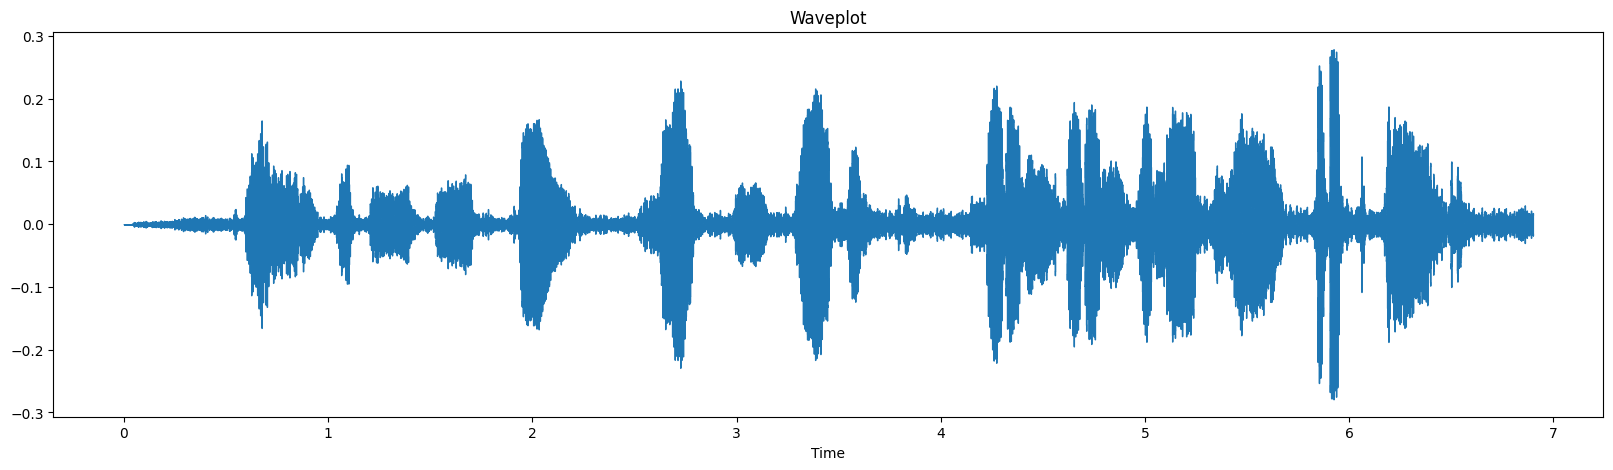

In [36]:
x , sr = librosa.load(path)
plt.figure(figsize=(20, 5))
plt.title('Waveplot')
librosa.display.waveshow(x, sr=sr)
plt.show()

In [17]:
signal = x

In [18]:
type(signal)

numpy.ndarray

In [19]:
df = pd.DataFrame({'time': range(len(signal)), 'signal': np.abs(signal)})
df.head()

,time,signal
0,0,1.196281e-06
1,1,1.512047e-06
2,2,2.150722e-07
3,3,1.612107e-06
4,4,1.848413e-06


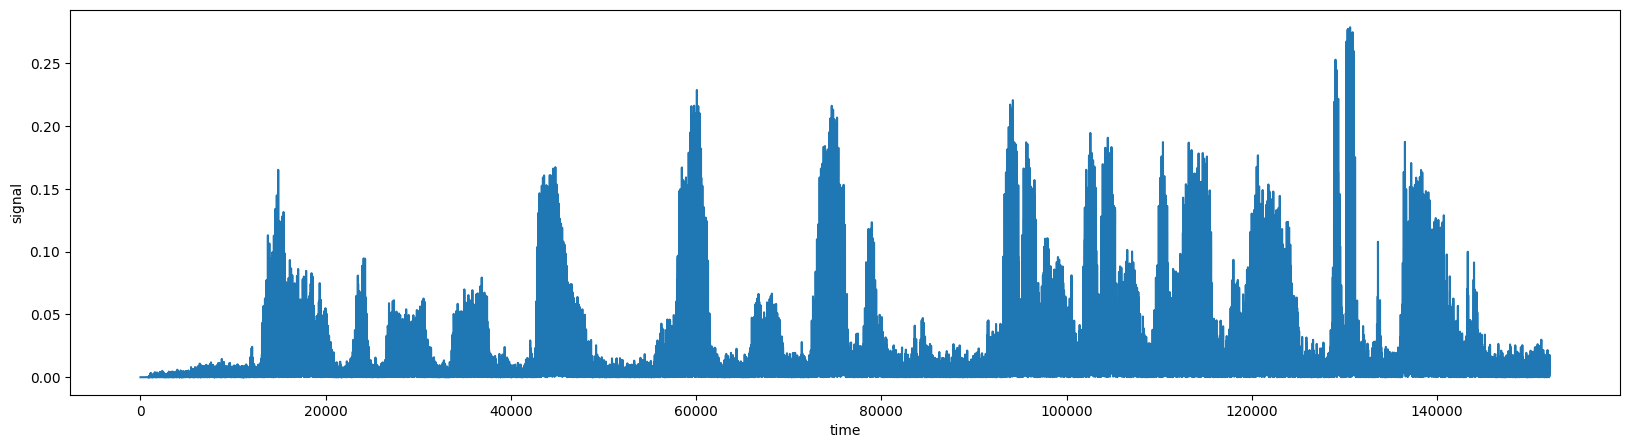

In [20]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df, x='time', y='signal')
plt.show()

In [21]:
df['moving_average'] = df['signal'].rolling(2000).sum()
df.tail()

,time,signal,moving_average
152140,152140,0.013501,15.336010
152141,152141,0.012877,15.339868
152142,152142,0.010857,15.341882
152143,152143,0.007351,15.340405
152144,152144,0.003315,15.334741


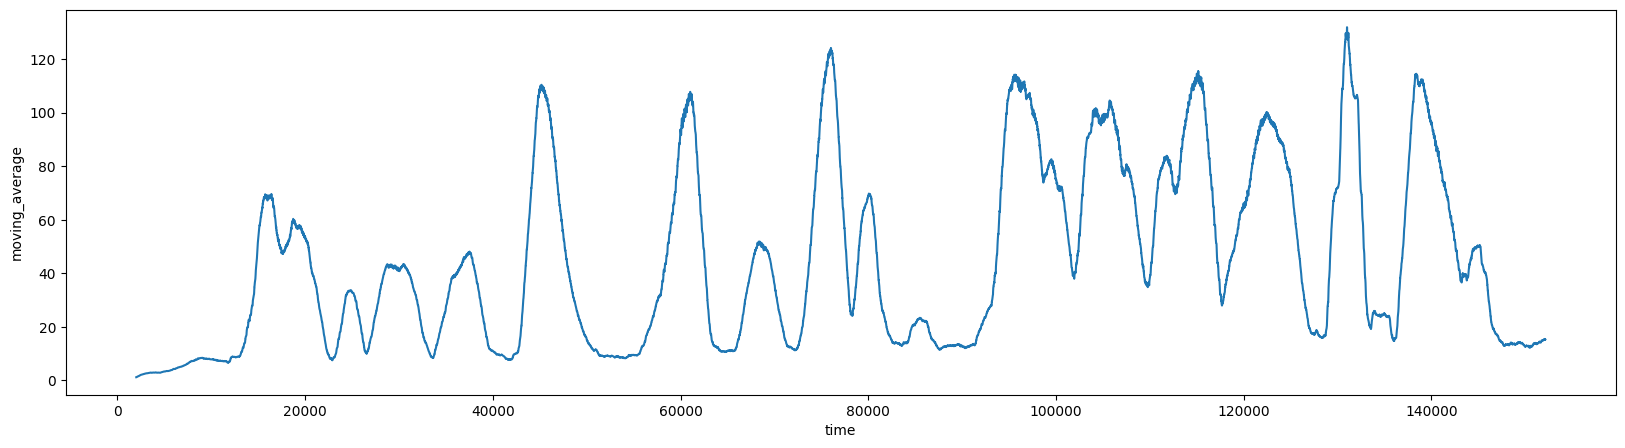

In [22]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df, x='time', y='moving_average')
plt.show()

!pip install peakdetect

In [37]:
pip install peakdetect

In [38]:
import peakdetect
peaks = peakdetect.peakdetect(df['moving_average'], df['time'], delta=12)

In [39]:
drop_df = pd.DataFrame(peaks[1])
drop_df.columns = ['time', 'signal']
drop_df

,time,signal
0,17630,47.261554
1,22885,7.536524
2,26560,9.998756
3,33582,8.413835
4,41774,7.699101
5,54094,8.254298
6,64786,10.623372
7,72180,11.244827
8,78299,24.104933
9,87620,11.479610


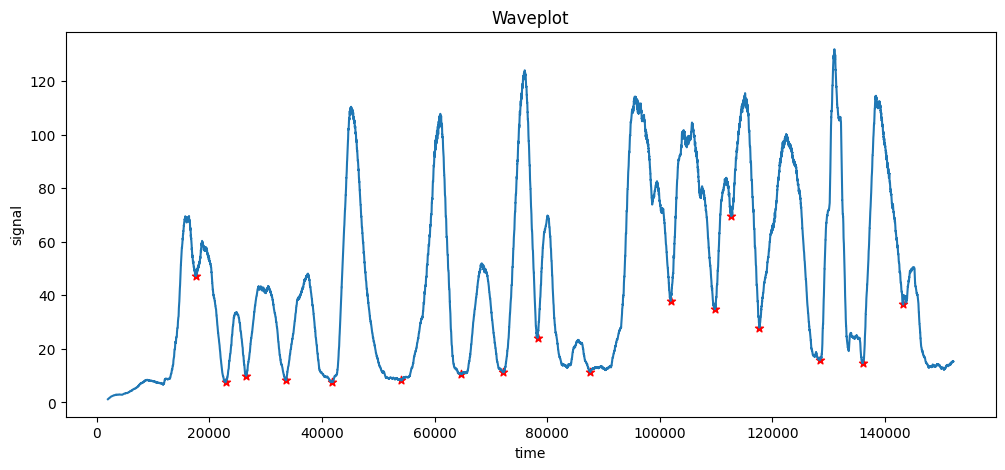

In [40]:
plt.figure(figsize=(12, 5))
plt.plot(df['time'], df['moving_average'])
plt.scatter(drop_df['time'], drop_df['signal'], color='red', marker='*')

plt.title('Waveplot')
plt.xlabel('time')
plt.ylabel('signal')

plt.show()

In [41]:
import os

In [42]:
audio_path = []
for dirname, _, filenames in os.walk('/content/test/audio'):
    for filename in filenames:
        audio_path.append(os.path.join(dirname, filename))
hindi_df = pd.DataFrame({'file': audio_path[:100]})
hindi_df.head()

,file
0,/content/test/audio/0160_069.wav
1,/content/test/audio/3029_088.wav
2,/content/test/audio/0305_061.wav
3,/content/test/audio/1434_086.wav
4,/content/test/audio/0167_008.wav


In [45]:
import speech_recognition as sr
r = sr.Recognizer()
def speech_hindi(file):
    sample_audio = sr.AudioFile(file)
    with sample_audio as source:
        audio = r.record(source) #duration
    hindi_text = r.recognize_google(audio, language='hi-IN')
    return hindi_text

In [46]:
hindi_df['google_transcription'] = hindi_df['file'].apply(lambda x: speech_hindi(x))
hindi_df.head()

,file,google_transcription
0,/content/test/audio/0160_069.wav,1 दिन वायुसेना ने उसे कलम बनाने में मदद मां
1,/content/test/audio/3029_088.wav,रोटियां तूने ऐसी बनाई है कि खाली नहीं
2,/content/test/audio/0305_061.wav,जिस मित्र को यह बर्फ वाला कागज मिलता है वह आपक...
3,/content/test/audio/1434_086.wav,दादाजी मुस्कुराए यह पेड़ मेरी लाश पर ही गिरेगा...
4,/content/test/audio/0167_008.wav,क्या तुम बता सकते हो कि सुशीला अगला कलम कहां ब...


In [47]:
def preprocessing_num(filenum):
    filenum = str(filenum)
    if len(filenum) == 3:
        filenum = '0' + filenum
    return filenum

In [48]:
actual_trans = pd.read_csv('/content/test/transcription.txt', sep='_', header=None)
actual_trans.columns = ['file', 'transcription']
actual_trans.head()

,file,transcription
0,116,003 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
1,116,008 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
2,116,025 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
3,116,036 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
4,116,061 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...


In [49]:
actual_trans['file'] = actual_trans['file'].apply(lambda x: preprocessing_num(x))
actual_trans.head()

,file,transcription
0,0116,003 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
1,0116,008 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
2,0116,025 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
3,0116,036 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
4,0116,061 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...


In [50]:
actual_trans['file'] = '/content/test/audio/' + actual_trans['file'] + '_' + actual_trans['transcription'].str[:3] + '.wav'
actual_trans.head()

,file,transcription
0,/content/test/audio/0116_003.wav,003 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
1,/content/test/audio/0116_008.wav,008 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
2,/content/test/audio/0116_025.wav,025 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
3,/content/test/audio/0116_036.wav,036 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...
4,/content/test/audio/0116_061.wav,061 और अपने पेट को माँ की स्वादिष्ट गरमगरम जले...


In [51]:
actual_trans['transcription'] = actual_trans['transcription'].str[3:]
actual_trans.head()

,file,transcription
0,/content/test/audio/0116_003.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...
1,/content/test/audio/0116_008.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...
2,/content/test/audio/0116_025.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...
3,/content/test/audio/0116_036.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...
4,/content/test/audio/0116_061.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...


In [52]:
hindi_df = pd.merge(hindi_df, actual_trans, on='file')
hindi_df.head()

,file,google_transcription,transcription
0,/content/test/audio/0160_069.wav,1 दिन वायुसेना ने उसे कलम बनाने में मदद मां,एक दिन वायुसेना ने उस से कोलम बनाने में मदद म...
1,/content/test/audio/3029_088.wav,रोटियां तूने ऐसी बनाई है कि खाली नहीं,फिर रोटियाँ तूने ऐसी बनाई हैं कि खाई नहीं जातीं
2,/content/test/audio/0305_061.wav,जिस मित्र को यह बर्फ वाला कागज मिलता है वह आपक...,जिस मित्र को यह बर्फ़ वाला कागज़ मिलता है वह आप...
3,/content/test/audio/1434_086.wav,दादाजी मुस्कुराए यह पेड़ मेरी लाश पर ही गिरेगा...,दादाजी मुस्कराए यह पेड़ मेरी लाश पर ही गिरेगा ...
4,/content/test/audio/0167_008.wav,क्या तुम बता सकते हो कि सुशीला अगला कलम कहां ब...,क्या तुम बता सकते हो कि सुशीला अगला कोलम कहाँ...


In [53]:
actual_trans.shape

(3843, 2)

In [54]:
import tensorflow as tf

In [55]:
tokenizer_1 = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer_1.fit_on_texts(hindi_df['transcription'].values)
sequences_1 = tokenizer_1.texts_to_sequences(hindi_df['google_transcription'].values)
sequences_2 = tokenizer_1.texts_to_sequences(hindi_df['transcription'].values)
longest_sentence = len(max(sequences_1, key=len))

In [56]:
padseq_1 = tf.keras.preprocessing.sequence.pad_sequences(sequences_1, maxlen=longest_sentence, padding='post')
padseq_2 = tf.keras.preprocessing.sequence.pad_sequences(sequences_2, maxlen=longest_sentence, padding='post')

In [57]:
padseq_1.shape, padseq_2.shape

((100, 18), (100, 18))

In [58]:
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
cosine_similarity(padseq_1, padseq_2)mean()

0.44262526492034193

In [72]:
def create_mfcc_features(path):
    mfccs = []
    try:
        x , sr = librosa.load(path)
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
        mfccs = np.mean(mfccs.T,axis=0)
    except:
        print('Error reading audio')
    return mfccs

In [73]:
actual_trans.head()

,file,transcription
0,/content/test/audio/0116_003.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...
1,/content/test/audio/0116_008.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...
2,/content/test/audio/0116_025.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...
3,/content/test/audio/0116_036.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...
4,/content/test/audio/0116_061.wav,और अपने पेट को माँ की स्वादिष्ट गरमगरम जलेबिय...


In [74]:
actual_trans.shape

(3843, 2)

In [75]:
len(audio_path)

3843

In [76]:
%time
X_df = pd.DataFrame(actual_trans['file'].apply(lambda x: create_mfcc_features(x)).tolist())
X_df.head()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-413.731079,202.988464,-9.403749,7.760667,16.113934,-26.611078,-0.914599,6.285877,-18.585758,-5.064695,...,-0.281176,-0.300988,-0.842167,-0.577311,-0.584766,-0.811179,-0.058406,0.099154,-0.099879,0.360742
1,-513.192505,167.762115,-21.634340,11.043978,24.429489,-24.243023,-11.504856,-3.298178,-15.009914,-4.811722,...,0.036178,-0.230741,-0.626543,-0.051469,0.235873,-0.248679,-0.096181,0.185639,-0.060392,-0.124379
2,-321.228088,155.939667,-31.592634,-3.754803,10.978620,-19.855406,3.170902,-2.720894,-22.187681,2.699138,...,0.110120,-0.233073,-0.453354,0.143620,-0.133128,-0.307587,0.463530,0.129920,-0.235795,0.424686
3,-301.581451,167.795868,-11.327118,12.622824,5.845013,-44.662750,-13.139596,2.450946,-21.156858,-12.827118,...,0.042352,-0.101852,-0.473239,-0.133865,0.256184,0.027695,-0.011515,0.173058,-0.027301,-0.232027
4,-383.658966,151.837830,-2.504714,14.271193,8.282435,-39.014824,-19.561844,-5.564025,-16.416258,-3.797566,...,0.178682,0.193558,-0.246550,0.011244,0.189521,-0.084354,0.095811,-0.080601,-0.371897,-0.001325


In [77]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(actual_trans['transcription'].values)
sequences = tokenizer.texts_to_sequences(actual_trans['transcription'].values)
longest_sentence = len(max(sequences, key=len))
padseq = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=longest_sentence, padding='post')
padseq[:10]

array([[  3,  21, 711,   8, 223,   4, 712, 713, 714, 715,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  21, 711,   8, 223,   4, 712, 713, 714, 715,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  21, 711,   8, 223,   4, 712, 713, 714, 715,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  21, 711,   8, 223,   4, 712, 713, 714, 715,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  21, 711,   8, 223,   4, 712, 713, 714, 715,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  21, 711,   8, 223,   4, 712, 713, 714, 715,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  21, 711,   8, 223,   4, 712, 713, 714, 715,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  21, 711,   8, 223,   4, 712, 713, 714, 715,   0,   0,   0,
   

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(np.array(X_df), padseq, test_size=0.10)

In [79]:
x_train = x_train.reshape(x_train.shape[0], 16, 8, 1)
x_val = x_val.reshape(x_val.shape[0], 16, 8, 1)

In [80]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(longest_sentence, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 16)         160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 4, 16)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 8)           1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 2, 8)           0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1

In [2]:
# import pandas as pd
# df = pd.read_parquet('/content/train-00000-of-00001-a09b74b3ef9c3b56.parquet')
# df.to_csv('output.csv', index=False)